<a href="https://colab.research.google.com/github/abou-zithar/ZEP_task_Retail__shipping__goods_to_USA/blob/main/ZEP_task_Retail__shipping__goods_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zep Task**

In [ ]:
#import lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos, acos

In [ ]:
# connect to drive 
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# use pandas to read data 
filepath='/content/drive/MyDrive/datasets/ZepDataSet.xlsx'
data=pd.read_excel(filepath,parse_dates=['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'])

In [ ]:
data.head()

In [ ]:
data.tail()

# **get the distane between the places that the truck seen in**

In [ ]:

def get_distance(slat,slon,elat,elon):
  dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
  return dist


In [ ]:
truck=data['tripuid']
count=0
trip_distance=[]
truck_id=[]
for i in range(0,len(truck)):
  if i<len(truck)-1:
    if truck[i] == truck[i+1]:
      trip_distance.append(get_distance(data['sighting_location_lat'][i],data['sighting_location_lon'][i],data['sighting_location_lat'][i+1],data['sighting_location_lon'][i+1])) 
      truck_id.append(truck[i])
  else:
    break


In [ ]:
print('we have total of {} distance  and total of {} truck id with repeation  '.format(len(trip_distance),len(truck_id)))

# **get the distance of the Full trip**

In [ ]:

total_trip_distance = [i+1 for i in range(67)]
index=0

for i in range(0,len(truck_id)):
  if i<len(truck_id)-1:
      if truck_id[i] == truck_id[i+1]:
        total_trip_distance[index]=trip_distance[i]+trip_distance[i+1]
      else:
        index+=1

In [ ]:
print('we have total of {} trip with the distance of all of them  '.format(len(total_trip_distance)))

# add the Full Trip distance to the data

In [ ]:
counter=0
FullDistance=[]
data['FullDistance']= data['tripuid'] * 0
for i in range(0,len(data['tripuid'])):
  if i<len(data['tripuid'])-1:
      if data['tripuid'][i] == data['tripuid'][i+1]:
        FullDistance.append(total_trip_distance[counter])
        
      else:
       

        counter+=1
        FullDistance.append(total_trip_distance[counter])


FullDistance.append(FullDistance[-1])
data['FullDistance']=FullDistance



In [ ]:
data['origin_location'].unique()

In [ ]:
data['destination_location'].unique()

In [ ]:
data.drop(['destination_location','origin_location'],inplace=True,axis=1)

In [ ]:
data.duplicated().sum()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
data.info()

<h4> as we can see the data has no nulls and the data is datatime64 type 

In [ ]:
def getDeltaOfTiem(feature_from,feature_to):
  # create a column with timedelta as total hours, as a float type
  data['tot_hour_diff'] = (data[feature_from] - data[feature_to]) / pd.Timedelta(hours=1)

getDeltaOfTiem('train_arrival_date','origin_departure_date')

In [ ]:
data['tot_hour_diff']

In [ ]:
data.describe()

In [ ]:

# data['D_'+'Trip_time'] = [d.day for d in data['Trip_time']]
# data['H_'+'Trip_time'] = [d.hour for d in data['Trip_time']]
# data['M_'+'Trip_time'] = [d.minute for d in data['Trip_time']]

In [ ]:
def recreateTimeAndDateFeatures(Feature):
  data['Y_'+Feature] = [d.year for d in data[Feature]]
  data['month_'+Feature] = [d.month for d in data[Feature]]
  data['D_'+Feature] = [d.day for d in data[Feature]]
  data['H_'+Feature] = [d.hour for d in data[Feature]]
  data['M_'+Feature] = [d.minute for d in data[Feature]]



recreateTimeAndDateFeatures('location_arrival_date')
recreateTimeAndDateFeatures('location_departure_date')
recreateTimeAndDateFeatures('origin_departure_date')
recreateTimeAndDateFeatures('train_arrival_date')

data.drop(['location_arrival_date','location_departure_date','origin_departure_date','train_arrival_date'],inplace=True,axis=1)

In [ ]:
data.head()

In [ ]:
data.info()

<h1> Visualization⌛

In [ ]:
import seaborn as sns

In [ ]:
sns.displot(data=data, x="Y_origin_departure_date", kind="kde")

In [ ]:
sns.displot(data=data, x="D_origin_departure_date")
sns.displot(data=data, x="D_train_arrival_date")

In [ ]:
sns.histplot(data=data,x='H_train_arrival_date',y='D_train_arrival_date')

In [ ]:
sns.histplot(x=data['tot_hour_diff'],kde=True)
data['tot_hour_diff'].mean()

<h1> the mean of the trip time is 84.81 hour and the range of all trips is 50 to 105 


In [ ]:
data['tot_hour_diff'].describe()

# the mean of trips time is 3 days 12 (84.812697) hours but the max is 11 days (270.566667)so we will check outliers

In [ ]:
sns.boxplot(x=data['tot_hour_diff'])

# the is small outliers we can drop it or leave it it will not affect the model

In [ ]:
sns.histplot(data=data,x='FullDistance' ,binwidth=500,kde=True)
data['FullDistance'].mean()

# all most all trips cut from 1000 km to 2000 km

In [ ]:
data.head()

In [ ]:

new_data=pd.get_dummies(data=data,columns=['sighting_location'],drop_first=True)

target=new_data.drop(['tripuid'],inplace=True,axis=1)


In [ ]:
target_model_hour=new_data['H_train_arrival_date']
target_model_minute=new_data['M_train_arrival_date']


In [ ]:
total_train_arrival_date=(target_model_hour*60)+target_model_minute
total_train_arrival_date

In [ ]:
new_data.drop(['M_train_arrival_date','H_train_arrival_date'],inplace=True,axis=1)
new_data['time_train_arrival_date']=total_train_arrival_date

In [ ]:
new_data.head()

In [ ]:
data['sighting_location'].unique()

In [ ]:
data=new_data.drop(['time_train_arrival_date'],axis=1)

In [ ]:
plt.figure(figsize=(25,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
corr=data.corr()
columns=np.full(corr.shape[0],False,dtype=bool)
columns

In [ ]:
for i in range(0,corr.shape[0]):
    if corr.iloc[0,i]>0.1:
        columns[i]=True

In [ ]:
selected_columns=data.columns[columns]

In [ ]:
selected_columns

In [ ]:
high_features=data[selected_columns]
high_features.head()

In [ ]:
data_copy=data.drop(selected_columns,axis=1)

In [ ]:
X=data_copy.values

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import Normalizer 
nor=Normalizer()
X=nor.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca_components=pca.fit_transform(X)

In [ ]:
variance_eplained=pca.explained_variance_ratio_
comulative_variance=np.cumsum(variance_eplained)

In [ ]:
plt.figure(figsize=(6,4))
plt.clf()
plt.plot(comulative_variance)
plt.xlabel('Number of components ')
plt.ylabel("Variance Ratio")
plt.grid()
plt.show()

In [ ]:
pca_data=pd.DataFrame(data=pca_components)

In [280]:
Final_data=pd.concat([high_features,pca_data],axis=1)
Final_data.dropna(inplace=True)
Final_data.isna().sum()

sighting_location_lat                        0
sighting_location_lon                        0
sighting_location_DELRAY, MI                 0
sighting_location_DETROIT NORTH YARD, MI     0
sighting_location_DETROIT STERLING, MI       0
sighting_location_OAKWOOD, MI                0
sighting_location_ROUGE RIVER SCANNER, MI    0
sighting_location_SAND CREEK, MI             0
sighting_location_STERLING HEIGHTS, MI       0
sighting_location_TAYLOR, MI                 0
sighting_location_WARREN, MI                 0
0                                            0
1                                            0
2                                            0
3                                            0
4                                            0
5                                            0
6                                            0
7                                            0
8                                            0
9                                            0
dtype: int64

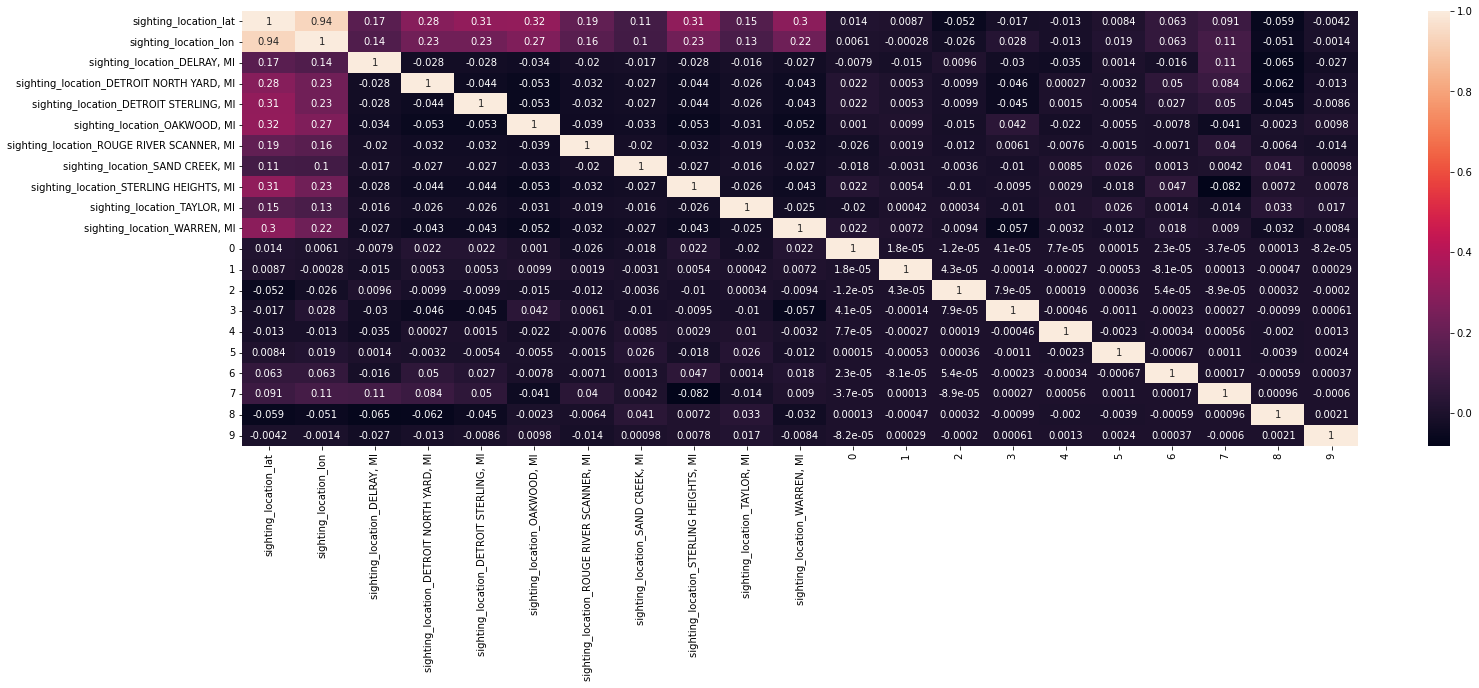

In [281]:
plt.figure(figsize=(25,8))
sns.heatmap(Final_data.corr(),annot=True)

In [286]:
X=Final_data
y=new_data.iloc[:-4,-1]

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [288]:
from sklearn.ensemble import RandomForestRegressor


In [289]:
regr =RandomForestRegressor()

In [290]:
regr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestRegressor()

In [291]:
y_pred=regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [292]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [293]:
mean_absolute_error(y_test, y_pred)

0.00021782858827363251

In [294]:
mean_squared_error(y_test, y_pred)

2.79454477897835e-07